In [1]:
import pandas as pd
import json
import numpy as np
import itertools
from itertools import combinations
def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [176]:
# Load data for the city Montreal because it has a lot of data
data_path = './data/montreal/'
review_file = 'review.json'
business_file = 'business.json'
user_file = 'user.json'
tip_file = 'tip.json'
checkin_file = 'checkin.json'

reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file)
users = load_jsons(data_path, user_file)
tips = load_jsons(data_path, tip_file)
checkins = load_jsons(data_path, checkin_file)

In [177]:
print(len(reviews))

4734


In [178]:
display(reviews.head())
display(businesses.head())
display(users.head())
display(tips.head())
display(checkins.head())

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,GjKsbGAO8Qu1z5eWv-40sA,F6MPrQ5oxQL2Wq1v5ENDzA,DKfziYWHMTFf7_zG9rOkag,5.0,0,0,0,The store has a nice men's department downstai...,2016-09-30 20:07:46
1,3kxwveEv9kn22pOs6P51OA,LUHwtIgfclx_9PKfJJQ1YA,w8fIvdOCIRpS05fYhTPO0w,4.0,1,0,0,"This is my first time going to Yeh, as my daug...",2016-08-25 12:11:12
2,NwcBNe5LuMk-5pepootkZA,VKAiaNnbqSyQYeA3LeB7oA,VtFugSIBooK7UDBcojGYag,1.0,0,5,0,Worst fucking place on the planet! Waited 30 m...,2015-10-12 13:51:02
3,6qmS0oCbEKNchnNY2SphRg,FtZwCY_jZvWh5l-skWuafQ,m16v3Xf6-35vCUDLU95OLg,4.0,0,0,0,Stayed for four nights at this place and it wa...,2017-10-24 23:31:07
4,0-5luekTkJCrK8ZEsitVow,fpMDCUiAZ0kwk9nmt6Zihg,m16v3Xf6-35vCUDLU95OLg,3.0,0,0,0,"Service was exceptional, I'll give them that. ...",2018-07-08 00:46:44


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,DQaX4mtW6WUgqfs-rzktLQ,Holiday Inn Express & Suites Montreal Airport,10888 Cote De Liesse,Montreal,QC,H8T 1A6,45.461053,-73.723134,3.5,8,1,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Hotels, Venues & Event Spaces, Hotels & Travel...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1,uHSmRkzznq0GpWXWuvzuhw,Noobox,"159 Rue Saint-Antoine O, Suite 118",Montreal,QC,H2Z 2A7,45.504364,-73.560705,2.0,8,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Restaurants, Fast Food, Noodles","{'Monday': '23:0-19:0', 'Tuesday': '23:0-19:0'..."
2,sEE_H7L-qjrtoHjwWiqpbQ,Roots - Centreville,1025 Rue Ste Catharine Ouest,Montreal,QC,H3B 1H1,45.500334,-73.572839,3.0,11,1,"{'BusinessParking': '{'garage': False, 'street...","Shopping, Fashion, Sports Wear, Department Sto...",None
3,KDdUiwg_r37o4P0JNIFHZg,Saq,"1176, Rue Ste-Catherine W",Montreal,QC,H3B 1H4,45.498987,-73.573464,3.0,3,1,{'RestaurantsPriceRange2': '2'},"Food, Beer, Wine & Spirits","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
4,DKfziYWHMTFf7_zG9rOkag,Club Monaco St. Catherine Street,1000 St Catherine St West,Montreal,QC,H3B 3S3,45.500521,-73.572197,4.5,3,1,"{'BusinessParking': '{'garage': False, 'street...","Men's Clothing, Women's Clothing, Fashion, Sho...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,U4INQZOPSUaj8hMjLlZ3KA,Michael,4308,2008-01-31 02:55:30,22757,10209,16249,"2008,2010,2011,2012,2013,2014,2015","yqumc_CYlWeghZ5vM3Ilyw, mX84lBw8jwS2uQqdgKu_aA...",912,...,75,43,13,52,442,656,801,801,663,634
1,5G1LLdZNxwswR1TjMfiMig,Iatemontreal,34,2015-11-29 04:33:21,7,0,4,,"0eqHXzghPVlRCX84V7W1uw, -8NmOimEaoqlmVW-uMcYyg...",1,...,0,0,0,0,1,0,0,0,0,0
2,6s-g2vFu12OemhiK3FJuOQ,Dave,2363,2007-02-14 14:51:38,21056,12720,17509,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...","syA7uYoDjohc7gWBWaEZmw, BtI41cEXpSeIS2hUn1kejg...",1010,...,274,351,412,239,1579,4988,4936,4936,778,1424
3,CY9iLsE2z_yLhLqJdD1WGw,Anthony,1359,2009-08-31 20:52:27,15283,10040,11902,"2010,2011,2012,2013,2014,2015,2016,2017,2018","RBzuT_RHgKFwBaU_-AdnAg, LRi2DFvZjvry-DiQkUeD2Q...",405,...,213,154,33,17,1779,2365,2644,2644,1114,813
4,FzT-ujff-c11Wa_WdItwig,Amy,460,2011-02-08 23:09:40,852,311,524,"2012,2013,2014,2015,2016,2017","FZNRzY6m67fhlnNE8XglTQ, ofeLGyYo5yACoVzahgExZg...",44,...,2,2,2,0,21,35,43,43,20,14


,user_id,business_id,text,date,compliment_count
0,3mtMXh05NnMRwJeS6BfOHA,EFOVNo26MCPe5dQC0HBifQ,Having a good cheap 5-7 beer,2010-02-01 22:45:03,0
1,adzKUB7XFQ2VLMbc3KU1Gg,0M6SBa63Mi2JkzMrnYhxJA,High end modern decor with tons of extras,2013-12-04 21:28:20,0
2,4YDE_B5VWhCa8sbkUmEkVg,JgKpVoemZ-Khkfgif5V7qQ,Amène un gilet pendant l'hiver... Il fait fret...,2013-12-13 05:03:02,0
3,sgO-FwBPk9ILVodd9H-QMQ,GuAa3tTE3zSr05sUOQYXzA,"It may be good, but it's so small that it is l...",2013-02-22 00:17:19,0
4,GnCm7qDmxkRO-kGAu2956Q,0M6SBa63Mi2JkzMrnYhxJA,Is literally in awe!! This hotel is off the ho...,2010-04-24 22:14:40,0


,business_id,date
0,-AZN6ojHeKPMubDFgDK84g,"2010-08-20 21:59:03, 2011-01-14 14:14:14, 2011..."
1,-QzEzzecQwgZKfUdbRzg3Q,"2015-02-26 16:12:38, 2015-06-10 19:31:26, 2015..."
2,-g6cohKUJkVjgDXrdzp5eQ,"2015-04-10 21:59:40, 2015-05-06 16:07:35, 2015..."
3,-sHoW6Zdgctp8cxvzRIJ0g,"2010-10-31 00:02:53, 2011-04-23 01:38:56, 2012..."
4,0M6SBa63Mi2JkzMrnYhxJA,"2010-02-08 06:32:16, 2010-03-21 15:58:25, 2010..."


In [192]:
# helper functions to predict ratings

def predict_ratings(similarity, utility, to_predict):
    """Predicts the predicted rating for the input test data.
    
    Arguments:
    similarity -- a dataFrame that describes the similarity between items
    utility    -- a dataFrame that contains a rating for each user (columns) and each movie (rows). 
                  If a user did not rate an item the value np.nan is assumed. 
    to_predict -- A dataFrame containing at least the columns movieId and userId for which to do the predictions
    """
    # copy input (don't overwrite)
    ratings_test_c = to_predict.copy()
    # apply prediction to each row
    ratings_test_c['predicted rating'] = to_predict.apply(lambda row: predict_ids(similarity, utility, row['user_id'], row['business_id']), axis=1)
    return ratings_test_c

### Helper functions for predict_ratings_item_based ###

def predict_ids(similarity, utility, userId, itemId):
    # select right series from matrices and compute
    if userId in utility.columns and itemId in similarity.index:
        return predict_vectors(utility.loc[:,userId], similarity[itemId])
    return 0

def predict_vectors(user_ratings, similarities):
    # select only movies actually rated by user
    relevant_ratings = user_ratings.dropna()
    
    # select corresponding similairties
    similarities_s = similarities[relevant_ratings.index]
    
    # select neighborhood
    similarities_s = similarities_s[similarities_s > 0.0]
    relevant_ratings = relevant_ratings[similarities_s.index]
    
    # if there's nothing left return a prediction of 0
    norm = similarities_s.sum()
    if(norm == 0):
        return 0
    
    # compute a weighted average (i.e. neighborhood is all) 
    return np.dot(relevant_ratings, similarities_s)/norm

def split_data(data, d = 0.75):
    """Split data in a training and test set.
    
    Arguments:
    data -- any dataFrame.
    d    -- the fraction of data in the training set
    """
    np.random.seed(seed=5)
    mask_test = np.random.rand(data.shape[0]) < d
    return data[mask_test], data[~mask_test]

def mse(predicted_ratings):
    """Computes the mean square error between actual ratings and predicted ratings
    
    Arguments:
    predicted_ratings -- a dataFrame containing the columns rating and predicted rating
    """
    diff = predicted_ratings['stars'] - predicted_ratings['predicted rating']
    return (diff**2).mean()

In [269]:
# split into training and test sets

df_training, df_test = split_data(reviews, d=0.7)

print(len(df_test[['user_id', 'business_id', 'stars']]))
len(df_training)

1430


3304

In [257]:
# make the rating utility matrix
only_reviews = reviews[['business_id','user_id','stars']].copy()
only_reviews = only_reviews.drop_duplicates()


utility_matrix = pd.DataFrame(index = list(only_reviews['business_id'].unique()), columns = list(only_reviews['user_id'].unique()))
for index,row in only_reviews.iterrows():
    utility_matrix.loc[row['business_id'], row['user_id']] = row['stars']
    

utility_matrix

,F6MPrQ5oxQL2Wq1v5ENDzA,LUHwtIgfclx_9PKfJJQ1YA,VKAiaNnbqSyQYeA3LeB7oA,FtZwCY_jZvWh5l-skWuafQ,fpMDCUiAZ0kwk9nmt6Zihg,BS7ddG47sdpQNTfHiVSE1w,C4gv2YfW6GqePWBBapph8A,2ti91j2F-kx2BmAo3eGbcg,KyccQreFL1t03FXTqYZhJA,G4KO5vJlwJEmEy3urXVGxw,...,asZDj_UExeeBlfUI54U8sA,-is2UKIVQ0hmHBa3RudV9A,r5fUZn7T45Pu5cmNBQDVdw,PLXMk93bH-EjpJre-rcbWw,QsvBG-qbQ-jgXSfVp8R5SQ,BaWal7CJGY0sfK8M-bJihQ,pD_DEwZtFnkFkIhMkN_gMA,aQ5b38lpeHJJNhk-JXMC3w,vRDPasWQ0MaWqE3Op19Lhw,IeJFKAMyMxwUrhA485xNqg
DKfziYWHMTFf7_zG9rOkag,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w8fIvdOCIRpS05fYhTPO0w,NaN,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VtFugSIBooK7UDBcojGYag,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m16v3Xf6-35vCUDLU95OLg,NaN,NaN,NaN,4,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OQnK4CAdkRvWf7hm9GWydw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HQyqBWvC4EzuX5tCaHWFOA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c44gbtQc4qssOKM1JGDtlg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
Tic83yogkRkNeXxMzL8utw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jga0EPnZD4sae5VKltpmBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
# this reformats the categories into a list instead of a string

better_categories = []

for i in range(len(businesses)):
    better_categories.append([i.lstrip() for i in (businesses.loc[i]['categories']).split(',')])


business_df = businesses[['business_id', 'is_open', 'attributes']].copy()    
    
business_df['categories'] = better_categories


business_df = business_df.loc[business_df['is_open'] == 1] 

business_df

b_df = business_df[['business_id','attributes','categories']]
                   
b_df

,business_id,attributes,categories
0,DQaX4mtW6WUgqfs-rzktLQ,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","[Hotels, Venues & Event Spaces, Hotels & Trave..."
1,uHSmRkzznq0GpWXWuvzuhw,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","[Restaurants, Fast Food, Noodles]"
2,sEE_H7L-qjrtoHjwWiqpbQ,"{'BusinessParking': '{'garage': False, 'street...","[Shopping, Fashion, Sports Wear, Department St..."
3,KDdUiwg_r37o4P0JNIFHZg,{'RestaurantsPriceRange2': '2'},"[Food, Beer, Wine & Spirits]"
4,DKfziYWHMTFf7_zG9rOkag,"{'BusinessParking': '{'garage': False, 'street...","[Men's Clothing, Women's Clothing, Fashion, Sh..."
...,...,...,...
148,c44gbtQc4qssOKM1JGDtlg,None,"[Transportation, Hotels & Travel, Limos]"
149,Tic83yogkRkNeXxMzL8utw,"{'ByAppointmentOnly': 'False', 'BikeParking': ...","[Eyewear & Opticians, Health & Medical, Optome..."
151,t2Eg5QRgLg9DWUeMe_Duhg,"{'NoiseLevel': 'u'average'', 'HappyHour': 'Fal...","[Nightlife, Cocktail Bars, Bars]"
152,ybJ2ojUz2a36PYaemY_zBg,None,"[Car Rental, Hotels & Travel]"


In [259]:
# this adds the attributes and categories into a single df to pivot for the similarity matrix

base_df = pd.DataFrame(columns =['business_id', 'category'])

base_df
bi = []
cs = []

for index,row in b_df.iterrows():
    for i in row['categories']:
        bi.append(row['business_id'])
        cs.append(i)

    
# one-hot encoding    
for index,row in b_df.iterrows():
    if row['attributes'] != None:
        d = row['attributes']
        for i in d.keys():
            v = d[i].strip('{}').split(',')
            for j in v:
                if j != 'None' and 'False' not in j and '\'none\'' not in j and 'u\'no\'' not in j:
                    bi.append(row['business_id'])
                    cs.append(str((i, j)))
        
base_df['business_id'] = bi
base_df['category'] = cs
        
base_df

,business_id,category
0,DQaX4mtW6WUgqfs-rzktLQ,Hotels
1,DQaX4mtW6WUgqfs-rzktLQ,Venues & Event Spaces
2,DQaX4mtW6WUgqfs-rzktLQ,Hotels & Travel
3,DQaX4mtW6WUgqfs-rzktLQ,Event Planning & Services
4,uHSmRkzznq0GpWXWuvzuhw,Restaurants
...,...,...
1223,dfo-LKRBm40etYpH-Rcsog,"('BusinessParking', "" 'street': True"")"
1224,dfo-LKRBm40etYpH-Rcsog,"('WiFi', ""'free'"")"
1225,dfo-LKRBm40etYpH-Rcsog,"('RestaurantsTakeOut', 'True')"
1226,dfo-LKRBm40etYpH-Rcsog,"('RestaurantsReservations', 'True')"


In [260]:
# this makes a categories utility matrix
def pivot_categories(df):
    
    return df.pivot_table(index = 'business_id', columns = 'category', aggfunc = 'size', fill_value=0)

df_utility_categories = pivot_categories(base_df)
display(df_utility_categories.head())

category,"('AcceptsInsurance', 'True')","('Alcohol', ""'full_bar'"")","('Alcohol', ""u'beer_and_wine'"")","('Alcohol', ""u'full_bar'"")","('Ambience', "" 'casual': True"")","('Ambience', "" 'classy': True"")","('Ambience', "" 'trendy': True"")","('Ambience', "" 'upscale': True"")","('Ambience', ""'touristy': True"")","('BestNights', "" 'friday': True"")",...,Used,Vegan,Vegetarian,Venues & Event Spaces,Vintage & Consignment,Wine & Spirits,Wine Bars,Women's Clothing,Yoga,Ziplining
business_id,,,,,,,,,,,,,,,,,,,,,
-AZN6ojHeKPMubDFgDK84g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-QzEzzecQwgZKfUdbRzg3Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
-sHoW6Zdgctp8cxvzRIJ0g,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0M6SBa63Mi2JkzMrnYhxJA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
0t8_ORXFIXTWK3zFmM7Dqw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
# make the similarity matrix from all the categories
def create_similarity_matrix_jaccard(matrix):
    m11 = matrix @ matrix.T
    m10 = pd.DataFrame(matrix.sum(axis = 1).values + np.zeros(m11.shape), index = m11.index, columns = m11.index)
    m01 = m10.T
    return m11/(m01 + m10 - m11)
    
df_similarity_categories = create_similarity_matrix_jaccard(df_utility_categories)
display(df_similarity_categories.head())

business_id,-AZN6ojHeKPMubDFgDK84g,-QzEzzecQwgZKfUdbRzg3Q,-sHoW6Zdgctp8cxvzRIJ0g,0M6SBa63Mi2JkzMrnYhxJA,0t8_ORXFIXTWK3zFmM7Dqw,1GcTd5Ii5fgIP2zmcbVPAA,1oLUTSK88LFuSAZQbTJTzA,2dPnfMUWdB1lORRD-I1cmA,3B1E1auHJxj6HTnkaXFC7Q,46-J3Ht5rxoJkXBzzoLEfA,...,vrI7YGKsWOJebJXDFpSVQg,w8fIvdOCIRpS05fYhTPO0w,wi06kW6hU8gEN3DIzK8P6w,wqsZzIM79Q--QP_lSRcPyg,x-4YTxRXrNaW6Rua2j-7wA,xGMi_V4QDq1xo0BrMWTRXg,ybJ2ojUz2a36PYaemY_zBg,yv1PZQnZaCuUOw_fMzCJjg,zNFW6mbNxrqJPaY8K9EizQ,zr_bmtM-SBIKKp2feKMWXw
business_id,,,,,,,,,,,,,,,,,,,,,
-AZN6ojHeKPMubDFgDK84g,1.000000,0.000000,0.071429,0.066667,0.111111,0.076923,0.0,0.05000,0.076923,0.000000,...,0.142857,0.000000,0.111111,0.041667,0.095238,0.0,0.111111,0.071429,0.076923,0.000000
-QzEzzecQwgZKfUdbRzg3Q,0.000000,1.000000,0.035714,0.000000,0.000000,0.083333,0.0,0.00000,0.083333,0.000000,...,0.153846,0.000000,0.000000,0.043478,0.047619,0.0,0.000000,0.166667,0.083333,0.047619
-sHoW6Zdgctp8cxvzRIJ0g,0.071429,0.035714,1.000000,0.034483,0.000000,0.037037,0.0,0.09375,0.037037,0.076923,...,0.111111,0.083333,0.000000,0.218750,0.423077,0.0,0.000000,0.074074,0.037037,0.121212
0M6SBa63Mi2JkzMrnYhxJA,0.066667,0.000000,0.034483,1.000000,0.111111,0.555556,0.0,0.00000,0.555556,0.000000,...,0.000000,0.000000,0.111111,0.000000,0.000000,0.0,0.111111,0.000000,0.400000,0.000000
0t8_ORXFIXTWK3zFmM7Dqw,0.111111,0.000000,0.000000,0.111111,1.000000,0.142857,0.0,0.00000,0.142857,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.142857,0.000000


In [262]:
# testing the model
predicted_genres = predict_ratings(df_similarity_categories,utility_matrix,df_test[['user_id', 'business_id', 'stars']])


mse_genres = mse(predicted_genres)

mse_genres

0.7814694760387786

In [263]:
# baseline

import random

def predict_random(df):
    
    predicted_random = df.copy()[['user_id', 'business_id', 'stars']]

    r = []
    for i in range(len(predicted_random['user_id'])):
        r.append(random.uniform(0.5, 5.0))
    
    predicted_random.insert(3, 'predicted rating', r, True)

    return predicted_random

In [264]:
mse_random = mse(predict_random(predicted_genres))

print(f'mse for random prediction: {mse_random:.2f}')

mse for random prediction: 4.19


In [265]:
mse_random = mse(predict_random(predicted_genres))

print(f'mse for random prediction: {mse_random:.2f}')

mse for random prediction: 4.16


In [266]:
mse_random = mse(predict_random(predicted_genres))

print(f'mse for random prediction: {mse_random:.2f}')

mse for random prediction: 4.31


In [270]:
predicted_genres

,user_id,business_id,stars,predicted rating
1,LUHwtIgfclx_9PKfJJQ1YA,w8fIvdOCIRpS05fYhTPO0w,4.0,3.956776
3,FtZwCY_jZvWh5l-skWuafQ,m16v3Xf6-35vCUDLU95OLg,4.0,4.000000
6,C4gv2YfW6GqePWBBapph8A,w8fIvdOCIRpS05fYhTPO0w,4.0,4.000000
11,kaij8B6O_up-NdLylOuWcg,lcTa0q9Wo4wNyLCIgWFRUA,3.0,3.195122
14,PbeWa_TZG2P4H9lGGrGCqg,OQnK4CAdkRvWf7hm9GWydw,4.0,4.000000
...,...,...,...,...
4717,9FWw6MC1Ys3Wxgfu5l1R2Q,wqsZzIM79Q--QP_lSRcPyg,5.0,5.000000
4724,r5fUZn7T45Pu5cmNBQDVdw,dfo-LKRBm40etYpH-Rcsog,4.0,4.000000
4729,pD_DEwZtFnkFkIhMkN_gMA,dfo-LKRBm40etYpH-Rcsog,5.0,5.000000
4730,aQ5b38lpeHJJNhk-JXMC3w,c44gbtQc4qssOKM1JGDtlg,1.0,1.000000


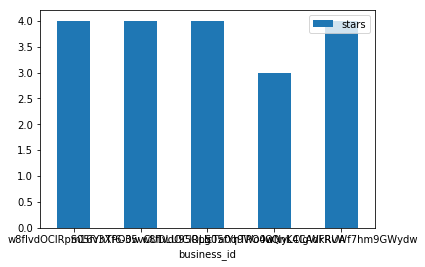

In [299]:
predicted_genres.head().plot.bar(x='business_id', y='stars', rot=0)

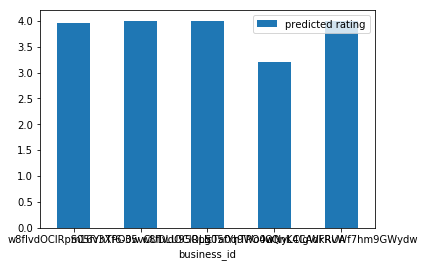

In [300]:
predicted_genres.head().plot.bar(x='business_id', y='predicted rating', rot=0)